In this notebook,
- the simulation data is analysed alongside main detector data

In [3]:
# importing functions for analysis
from functions import *

%load_ext autoreload
%autoreload 2

# sometimes needs to be run twice to get good plots
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Simulations with PENTrack

In this notebook, simulation results from PENTrack are used in conjection with the experimental analysis in order to determine various material parameters.

# Diffuse Reflection Probability

We assume that the tail of the main detection peak is the most sensitive parameter to the diffuse reflection probability of the materials. 

## Experimental Data

The example below shows a fit of the experimental data

fit will begin at 25.6 s
fit will end at 35.6 s
[[Model]]
    Model(expo)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 279
    # data points      = 100
    # variables        = 2
    chi-square         = 150.005973
    reduced chi-square = 1.53067320
    Akaike info crit   = 44.5504931
    Bayesian info crit = 49.7608334
[[Variables]]
    p0:  18.5491355 +/- 0.06468245 (0.35%) (init = 80)
    p1:  2.42866096 +/- 0.01363245 (0.56%) (init = 30)
[[Correlations]] (unreported correlations are < 0.100)
    C(p0, p1) = -0.997



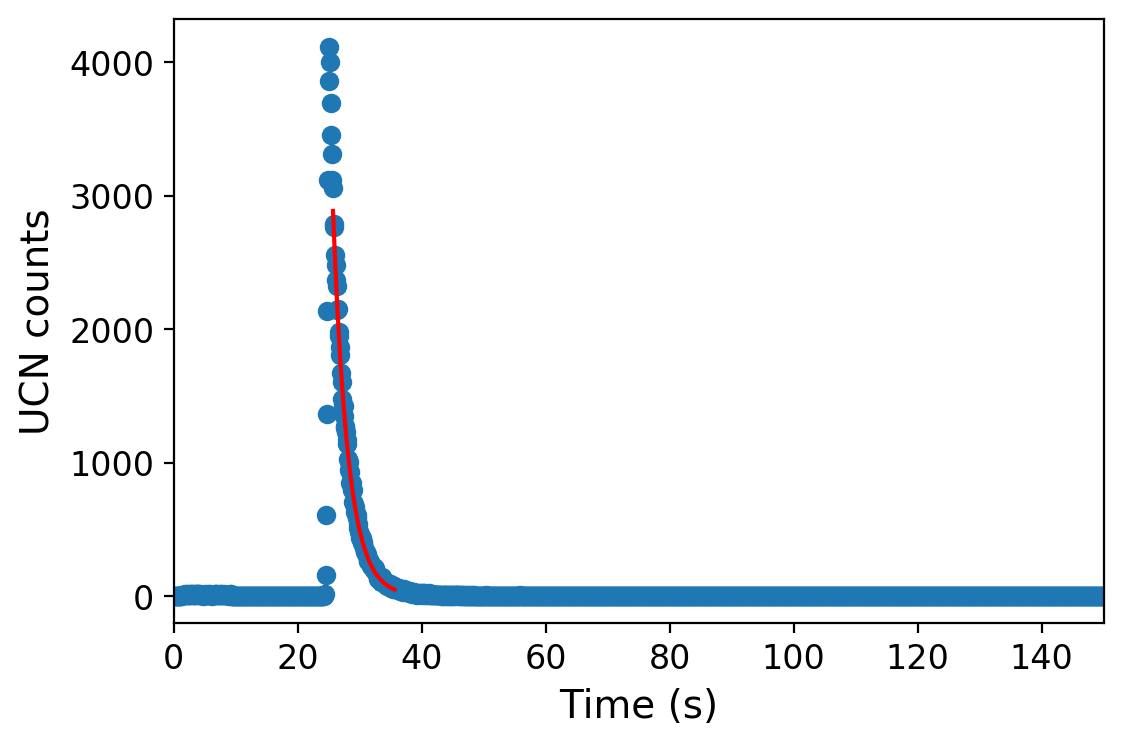

In [4]:
# load data from an example run 
filename = 'T081217_0034.tof'
arr = np.loadtxt("../data_ucn/main_detector/8/" + filename, usecols = (0,1));

# exponential function, same as ROOT's built-in 'expo'
def expo(x, p0, p1):
    return np.exp(p0 - 1/(p1) * x)

# times in seconds, specific to each run
irradiate_time = 8
fill_time = 8.6
pre_storage_time = 5
buffer_time = 4

# time length over which the fit will span
fit_span_time = 10

# compute the fit start and end times
fit_start_time = irradiate_time + fill_time + pre_storage_time + buffer_time
fit_end_time   = fit_start_time + fit_span_time

print('fit will begin at {} s'.format(fit_start_time))
print('fit will end at {} s'.format(fit_end_time))

# the experimental data is binned into 0.1s bins, and lmfit requires
# that we pass it the array we want fitted. We need to multiply these
# times to get the right indices for slicing the arrays
fit_start_index = int(fit_start_time * 10)
fit_end_index   = int(fit_end_time * 10)

# we get the arrays of counts and time, multiplying the values of t by 
# 0.1 to get it in seconds.
c = arr[fit_start_index:fit_end_index, 1]
t = arr[fit_start_index:fit_end_index,0] * 0.1

# construct weights, we deal with entries = 0 by giving them 0 weight
weights = np.zeros(np.shape(c))
for i in range(0,np.shape(c)[0]):
    if (c[i] != 0):
        weights[i] = 1 / np.sqrt(c[i])
    else:
        weights[i] = 0
        
gmodel = Model(expo)
result = gmodel.fit(c, x=t, p0=80, p1=30, weights = weights)

print(result.fit_report())
plt.plot(arr[:,0] * 0.1, arr[:,1], 'o')
plt.plot(t, result.best_fit, 'r-')
plt.xlim([0,150])
plt.ylabel('UCN counts', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('../img/rough_tail_fit.pdf')
plt.show()

Next, this is performed iteratively on the data from each run in both the TRIUMF-style normalization confirguration, and the JP-style normalization configuration. 

(NOMI,s005): tau = 2.6392+/-0.0035, ave redchi = 1.9242320302886313
(NOMI,s020): tau = 2.804+/-0.004, ave redchi = 1.3689480675425476
(NOMI,s100): tau = 3.184+/-0.010, ave redchi = 0.9317114283662207
(DISK,s005): tau = 2.874+/-0.011, ave redchi = 1.8455984131671508
(DISK,s020): tau = 3.047+/-0.012, ave redchi = 1.163441005209501
(DISK,s100): tau = 3.363+/-0.029, ave redchi = 0.9536154174433256


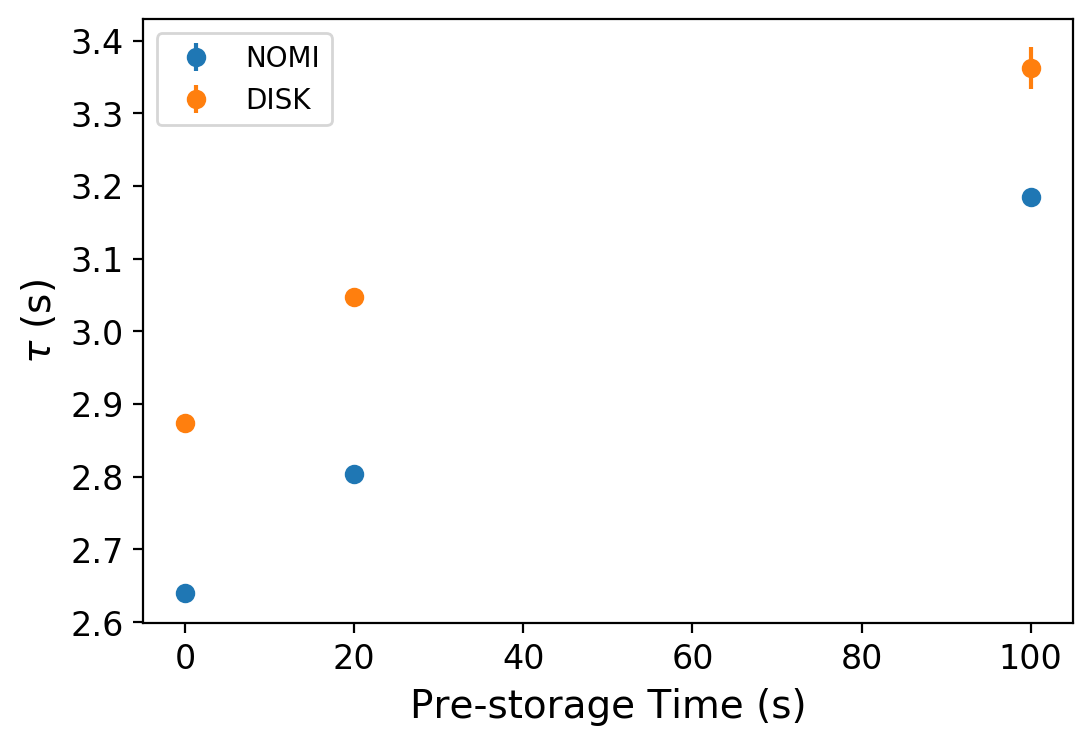

In [5]:
exp_p1_dict = fit_exp_detection_tail()

## Simulated Data

Using PENTrack, 20,000 particles are simulated in each simulation run. Simulations were only performed in the 85 mm normalization configuration. Below is a table showing the different simulation parameters for which simulations were performed. The root files are kept in the `data_sim` directory.

Filename (85mm_norm_{}.out.root)| Storage Time (s) | Lambert Ref. Prob. | Energy spectrum |   Configuration     |
---                             |     ---          |  ---               |  ---            |   ---               |
 020s_lp10_sqrt                 |      20          |  0.1               | $\sqrt{x}$      | 85 mm Normalization |
 100s_lp10_sqrt                 |     100          |  0.1               | $\sqrt{x}$      | 85 mm Normalization |
 100s_lp10_sqrt                 |       5          |  0.1               | $\sqrt{x}$      | 85 mm Normalization |
 020s_lp01_sqrt                 |      20          |  0.01              | $\sqrt{x}$      | 85 mm Normalization |
 100s_lp01_sqrt                 |     100          |  0.01              | $\sqrt{x}$      | 85 mm Normalization |
 100s_lp01_sqrt                 |       5          |  0.01              | $\sqrt{x}$      | 85 mm Normalization |
 020s_lp01_pow2                 |      20          |  0.01              | $x^2$           | 85 mm Normalization |
 100s_lp01_pow2                 |     100          |  0.01              | $x^2$           | 85 mm Normalization |
 100s_lp01_pow2                 |       5          |  0.01              | $x^2$           | 85 mm Normalization |
 020s_miro_sqrt                 |      20          |  none$^*$          | $\sqrt{x}$      | 85 mm Normalization |
 100s_miro_sqrt                 |     100          |  none              | $\sqrt{x}$      | 85 mm Normalization |
 100s_miro_sqrt                 |       5          |  none              | $\sqrt{x}$      | 85 mm Normalization |
 
$*$ - micro-roughness model used.

An example of the fitting with ROOT is shown, then all the various simulation data are fit iteratively.

##### Opening
../data_sim/85mm_norm_005s_lp01_sqrt_out.root
#####



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


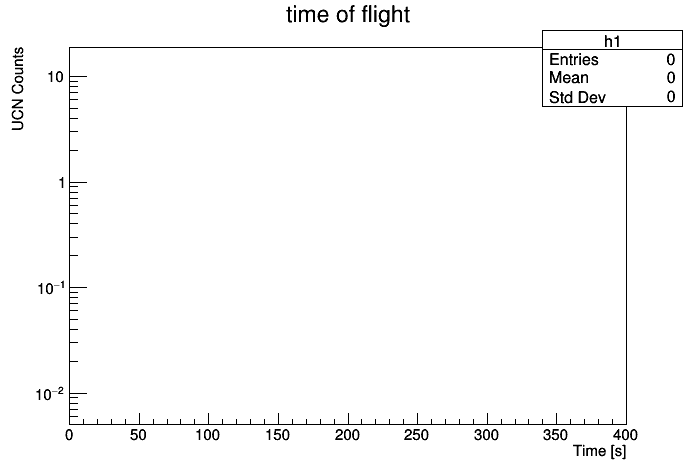

In [13]:
# open the appropriate file
filename = '../data_sim/85mm_norm_005s_lp01_sqrt_out.root'
f = ROOT.TFile.Open(filename)

# using rootpy to define the histogram
h1 = ROOT.TH1F("h1", "time of flight", 400, 0, 400)

# a canvas for plotting
canvas = ROOT.TCanvas("c1", "time of flight canvas", 700, 500)

# fill a histogram with only the neutrons ending in the detector
for evt in f.neutronend:
   if evt.solidend == 201: h1.Fill(evt.tend)

# logarithmic y scale 
canvas.SetLogy()

# draw histogram to the canvas
h1.Draw("hist")
canvas.Draw()

# fitting
# times relevant for fitting window selection
irradiate_time = 8
fill_time = 8.6
buffer_time = 4

# time length over which the fit will span
fit_span_time = 20

fit_start = irradiate_time + fill_time + 5 + buffer_time
fit_end   = fit_start + fit_span_time

f1 = ROOT.TF1("m1","exp([0]-1/[1]*x)", fit_start, fit_end)
f1.SetParameters(80,3)
fit = h1.Fit(f1, 'SRL')
redchi = fit.Chi2() / fit.Ndf()

set the axis ranges for viewability
h1.GetXaxis().SetRangeUser(fit_start-10, fit_end + 100)

get the slope, or inverse tau, parameter
slope = ufloat(f1.GetParameter(1), f1.GetParError(1))

h1.GetXaxis().SetTitle('Time [s]')
h1.GetYaxis().SetTitle('UCN Counts')
h1.Draw()
canvas.Draw()
# canvas.Print('sim_fit_example.pdf')

In [5]:
# iterative fitting

canvas_dict = {}
sim_p1_dict = {}

# !!! fix this iteration for the correct naming scheme
# !!! will require fixing everywhere (including in exp_p1)

for run_type in ['s005', 's020', 's100']:

    for diffuse_probability in [1, 10]:

        slope, redchi = sim_tau(config, run_type, diffuse_probability)

        sim_p1_dict[config,run_type,str(diffuse_probability)] = slope

        sim_p1_dict[config,run_type,str(diffuse_probability), 'redchi'] = redchi

##### Opening
../data_sim/NOMI_s005_dp01.root
#####

##### Opening
../data_sim/NOMI_s005_dp10.root
#####

##### Opening
../data_sim/NOMI_s020_dp01.root
#####

##### Opening
../data_sim/NOMI_s020_dp10.root
#####

##### Opening
../data_sim/NOMI_s100_dp01.root
#####

##### Opening
../data_sim/NOMI_s100_dp10.root
#####

 FCN=11.48 FROM MIGRAD    STATUS=CONVERGED     586 CALLS         587 TOTAL
                     EDM=1.3703e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.16345e+00   2.08482e-01   7.86042e-05  -1.21313e-02
   2  p1           1.03443e+01   6.68119e-01   2.49921e-04  -5.38534e-03
                               ERR DEF= 0.5
 FCN=14.6172 FROM MIGRAD    STATUS=CONVERGED     557 CALLS         558 TOTAL
                     EDM=3.18723e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                      

Info in <TCanvas::Print>: pdf file NOMI_s005_01_sim.pdf has been created
Info in <TCanvas::Print>: pdf file NOMI_s005_10_sim.pdf has been created
Info in <TCanvas::Print>: pdf file NOMI_s020_01_sim.pdf has been created
Info in <TCanvas::Print>: pdf file NOMI_s020_10_sim.pdf has been created
Info in <TCanvas::Print>: pdf file NOMI_s100_01_sim.pdf has been created
Info in <TCanvas::Print>: pdf file NOMI_s100_10_sim.pdf has been created


Experimental Data (NOMI, s005), average redchi = 1.9242320302886313
Simulated Data (NOMI, s005, 1), redchi = 1.4180743770593742
Simulated Data (NOMI, s005, 10), redchi = 1.6003903764963263
Experimental Data (NOMI, s020), average redchi = 1.3689480675425476
Simulated Data (NOMI, s020, 1), redchi = 0.7679529914437913
Simulated Data (NOMI, s020, 10), redchi = 1.6069815963231957
Experimental Data (NOMI, s100), average redchi = 0.9317114283662207
Simulated Data (NOMI, s100, 1), redchi = 1.0587953309471658
Simulated Data (NOMI, s100, 10), redchi = 0.9417162848769015


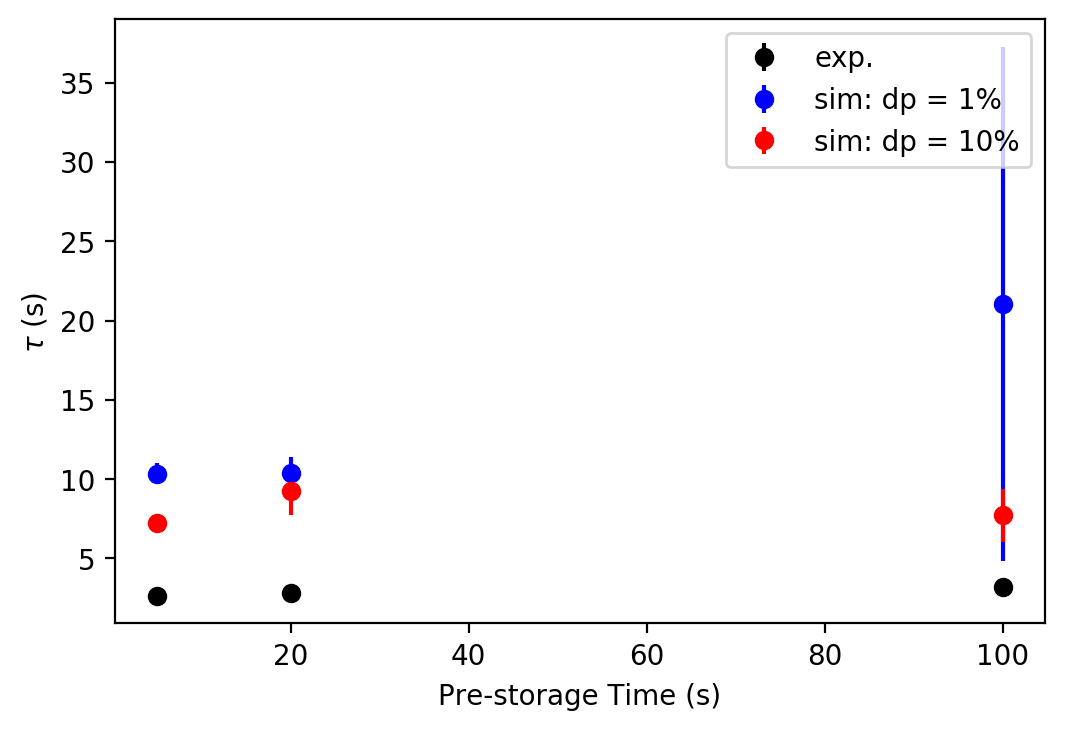

In [13]:
fig, ax = plt.subplots()
ax1 = plt.gca()

color_dict = {}
color_dict['1'] = 'b'
color_dict['10'] = 'r'

for config in ['NOMI']:
    
    for run_type in ['s005', 's020', 's100']:
    
        exp_slope = exp_p1_dict[config, run_type]
        
        ax.errorbar(float(run_type[1:4]), exp_slope.nominal_value, yerr = exp_slope.std_dev,
                       label = 'exp.', fmt = 'o', color = 'k')
        
        print('Experimental Data (' + config + ', ' + run_type + '), average redchi = {}'.format(
        exp_p1_dict[config, run_type, 'redchi']))
        
        for diffuse_probability in [1, 10]:
    
#             if (config == 'NOMI' and run_type == 's005' and diffuse_probability == 10):
            
            slope = sim_p1_dict[config, run_type, str(diffuse_probability)]

            color = color_dict[str(diffuse_probability)]
            
            ax.errorbar(float(run_type[1:4]), slope.nominal_value, yerr = slope.std_dev,
                       label = 'sim: dp = {}%'.format(diffuse_probability), fmt = 'o', color = color)
            
            print('Simulated Data (' + config + ', ' + run_type + ', ' + 
                  str(diffuse_probability) + '), redchi = {}'.format(
            sim_p1_dict[config, run_type, str(diffuse_probability), 'redchi']))
            
                
#             if (config == 'NOMI' and run_type == 's005' and diffuse_probability == 1):
            
#                 slope = sim_p1_dict[config, run_type, str(diffuse_probability)]
                
#                 color = next(ax1._get_lines.prop_cycler)['color']
                
#                 ax.errorbar(float(run_type[1:4]), slope.nominal_value, yerr = slope.std_dev,
#                            label = 'sim: dp = {}%'.format(diffuse_probability), fmt = 'o', color = color)
        
    
ax.set_ylabel(r'$\tau$ (s)')
ax.set_xlabel('Pre-storage Time (s)')
ax.legend();
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys());

# Energy Spectrum in the Pre-Storage Volume

Using the neutron snapshots produced in the simulation, we'll look at how the energy spectrum evolves over time within the pre-storage volume. The 100 second pre-storage data will give the best view of this. 

Info in <TCanvas::Print>: pdf file ../img/snap1Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap2Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap3Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap4Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap5Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap6Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap7Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap8Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap9Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap10Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap11Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap12Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap13Eend.pdf has been created
Info in <TCanvas::Print>: pdf file ../img/snap1

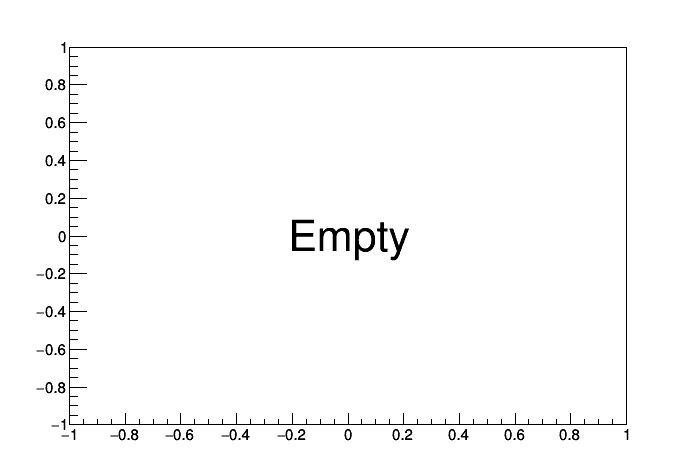

In [33]:
# f = ROOT.TFile.Open('../data_sim/85mm_norm_100s_lp01_sqrt_out.root')
# for i in range(1,177):
# # for i in range(100,101):
#     canvas = ROOT.TCanvas("c1_" + str(i), "canvas", 700, 500)
#     f.neutronsnapshot.Draw("Eend", "tend == " + str(i))
#     h1 = f.neutronsnapshot.GetHistogram()
#     mean = h1.GetMean()
#     line = ROOT.TLine(mean, 0, mean, h1.GetMaximum());
#     line.SetLineWidth(3)
#     line.Draw()
#     canvas.Draw()
#     canvas.Print('../img/snap' + str(i) + 'Eend.pdf')

In [ ]:
# !!! Collate PDFs.